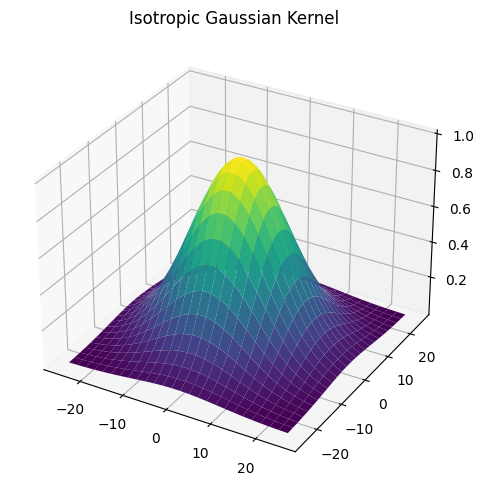

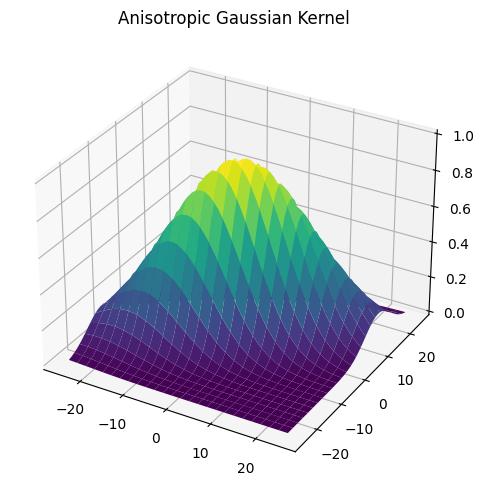

In [4]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义二维高斯核函数
def gaussian_kernel_2d(size, sigma_x, sigma_y, theta=0):
    """ 生成二维各向同性或各向异性的高斯核 """
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)

    # 旋转变换
    theta = np.deg2rad(theta)
    x_rot = xx * np.cos(theta) + yy * np.sin(theta)
    y_rot = -xx * np.sin(theta) + yy * np.cos(theta)

    kernel = np.exp(- (x_rot**2 / (2 * sigma_x**2) + y_rot**2 / (2 * sigma_y**2)))
    return kernel

# 设置参数
size = 51  # 核函数尺寸
sigma_iso = 10  # 各向同性高斯核的标准差
sigma_x_aniso, sigma_y_aniso = 15, 5  # 各向异性高斯核的标准差
theta_aniso = 30  # 各向异性高斯核旋转角度

# 生成各向同性和各向异性高斯核
gaussian_iso = gaussian_kernel_2d(size, sigma_iso, sigma_iso)  # 各向同性
gaussian_aniso = gaussian_kernel_2d(size, sigma_x_aniso, sigma_y_aniso, theta_aniso)  # 各向异性

# 创建网格坐标
x = np.linspace(-(size // 2), size // 2, size)
y = np.linspace(-(size // 2), size // 2, size)
X, Y = np.meshgrid(x, y)

# 绘制 3D 图像
fig1 = plt.figure(figsize=(12, 5))

# 各向同性高斯核
ax1 = fig1.add_subplot(111, projection='3d')
ax1.set_title("Isotropic Gaussian Kernel", fontsize=12)
ax1.plot_surface(X, Y, gaussian_iso, cmap='viridis')
# 调整布局并显示
plt.tight_layout()
plt.show()

# 各向异性高斯核
fig2 = plt.figure(figsize=(12, 5))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.set_title("Anisotropic Gaussian Kernel", fontsize=12)
ax2.plot_surface(X, Y, gaussian_aniso, cmap='viridis')

# 调整布局并显示
plt.tight_layout()
plt.show()


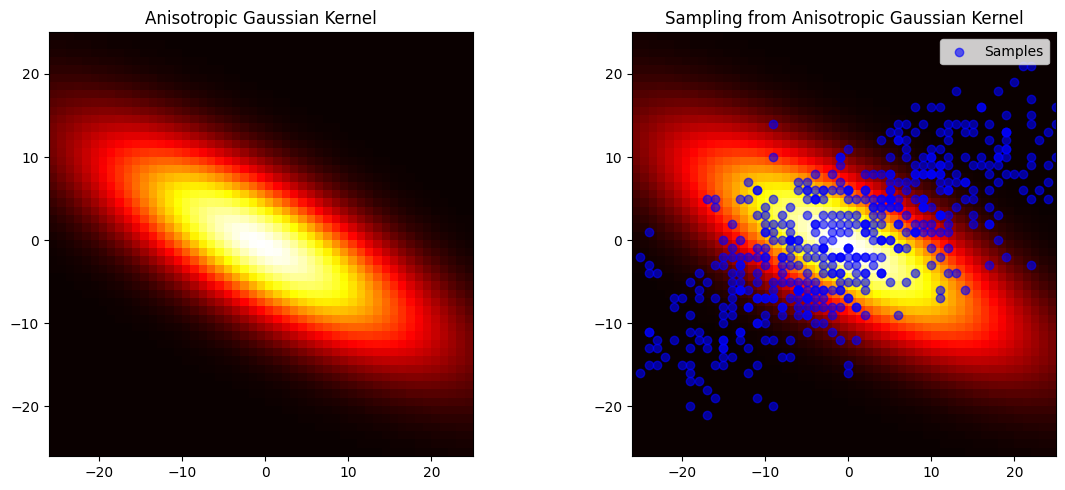

In [5]:
# 修正采样错误，正确展开索引
import numpy as np
import matplotlib.pyplot as plt

# 定义二维各向异性高斯核函数
def anisotropic_gaussian_kernel(size, sigma_x, sigma_y, theta=0):
    """ 生成二维各向异性高斯核 """
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)

    # 旋转坐标
    theta = np.deg2rad(theta)
    x_rot = xx * np.cos(theta) + yy * np.sin(theta)
    y_rot = -xx * np.sin(theta) + yy * np.cos(theta)

    # 计算各向异性高斯核
    kernel = np.exp(- (x_rot**2 / (2 * sigma_x**2) + y_rot**2 / (2 * sigma_y**2)))
    return kernel / kernel.sum()  # 归一化

# 生成各向异性高斯核
size = 51  # 核尺寸
sigma_x, sigma_y = 15, 5  # 各向异性标准差
theta = 30  # 旋转角度
gaussian_kernel = anisotropic_gaussian_kernel(size, sigma_x, sigma_y, theta)

# 生成样本点（按照高斯权重采样）
num_samples = 500

# 生成所有的坐标点
x_indices, y_indices = np.meshgrid(np.arange(size), np.arange(size))
x_indices = x_indices.flatten()
y_indices = y_indices.flatten()

# 按照高斯权重进行采样
samples = np.random.choice(len(x_indices), num_samples, p=gaussian_kernel.flatten())

# 获取采样的 x, y 坐标
sample_x = x_indices[samples]
sample_y = y_indices[samples]

# 可视化高斯核和采样点
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 绘制高斯核
axes[0].imshow(gaussian_kernel, cmap='hot', extent=[-size//2, size//2, -size//2, size//2])
axes[0].set_title("Anisotropic Gaussian Kernel")

# 绘制采样点
axes[1].imshow(gaussian_kernel, cmap='hot', extent=[-size//2, size//2, -size//2, size//2])
axes[1].scatter(sample_x - size//2, sample_y - size//2, color='blue', alpha=0.6, label="Samples")
axes[1].set_title("Sampling from Anisotropic Gaussian Kernel")
axes[1].legend()

plt.tight_layout()
plt.show()


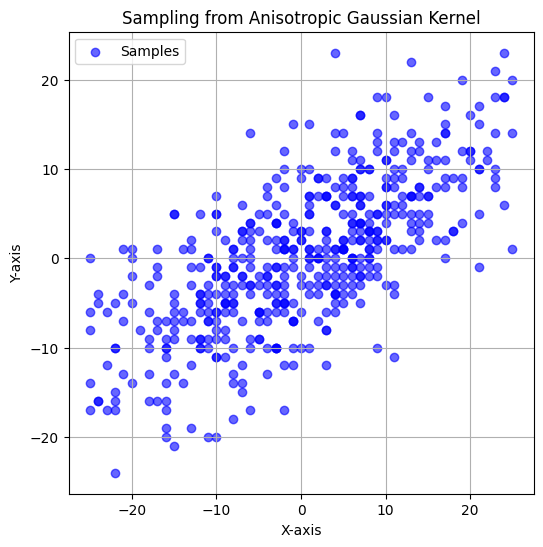

In [ ]:
# 仅绘制从二维各向异性高斯核采样得到的点
import numpy as np
import matplotlib.pyplot as plt

# 定义二维各向异性高斯核函数
def anisotropic_gaussian_kernel(size, sigma_x, sigma_y, theta=0):
    """ 生成二维各向异性高斯核 """
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)

    # 旋转坐标
    theta = np.deg2rad(theta)
    x_rot = xx * np.cos(theta) + yy * np.sin(theta)
    y_rot = -xx * np.sin(theta) + yy * np.cos(theta)

    # 计算各向异性高斯核
    kernel = np.exp(- (x_rot**2 / (2 * sigma_x**2) + y_rot**2 / (2 * sigma_y**2)))
    return kernel / kernel.sum()  # 归一化

# 生成各向异性高斯核
size = 51  # 核尺寸
sigma_x, sigma_y = 15, 5  # 各向异性标准差
theta = 30  # 旋转角度
gaussian_kernel = anisotropic_gaussian_kernel(size, sigma_x, sigma_y, theta)

# 生成样本点（按照高斯权重采样）
num_samples = 500

# 生成所有的坐标点
x_indices, y_indices = np.meshgrid(np.arange(size), np.arange(size))
x_indices = x_indices.flatten()
y_indices = y_indices.flatten()

# 按照高斯权重进行采样
samples = np.random.choice(len(x_indices), num_samples, p=gaussian_kernel.flatten())

# 获取采样的 x, y 坐标
sample_x = x_indices[samples] - size // 2
sample_y = y_indices[samples] - size // 2


# 仅绘制采样点
plt.figure(figsize=(6, 6))
plt.scatter(sample_x, sample_y, color='blue', alpha=0.6, label="Samples")
plt.title("Sampling from Anisotropic Gaussian Kernel")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# 添加图注（方差和旋转角度）
text_str = f"Variance: σ_x²={sigma_x**2}, σ_y²={sigma_y**2}\nRotation: θ={theta}°"
plt.text(-size//2 + 2, size//2 - 5, text_str, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.legend()
plt.grid()
plt.show()
